# Recipe Reviews and User Feedbacks

Objective:

The objective of this project is to develop a machine learning model that analyzes user reviews and feedback on recipes to extract meaningful insights, predict user preferences, and improve recipe recommendations.

Dataset Used : the Recipe Reviews and User Feedback Dataset from the UCI Machine Learning Repository

# Basic Preprocessing

In [1]:
#Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import joblib

In [3]:
# load dataset

In [4]:
df = pd.read_csv("C:\\Users\\anjal\\Desktop\\Recipe Reviews and User Feedback Dataset.csv",encoding="latin1")

In [5]:
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [6]:
df.tail()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
18177,114,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...
18181,118,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,1622717625,0,1,0,5,193,"OMG, you must make this cake. I made it for my..."


In [7]:
df.shape

(18182, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [9]:
df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [10]:
# Finding Missing Values

In [11]:
df.isnull().sum()

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64

In [12]:
# Handling missing values

In [13]:
imputer = SimpleImputer(strategy='most_frequent')
df[df.columns] = imputer.fit_transform(df)
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [14]:
df.isnull().sum()

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               0
dtype: int64

In [15]:
# finding duplicates

In [16]:
df.duplicated().sum()

0

No duplicates

In [17]:
# Detecting Outliers using IQR 

In [18]:
numeric_cols = df.select_dtypes(include=[np.number]).columns  
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [19]:
# Identifying Outliers

In [20]:
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
outliers

Series([], dtype: float64)

In [21]:
# Handling Outliers

In [22]:
for col in numeric_cols:
    upper_limit = Q3[col] + 1.5 * IQR[col]
    lower_limit = Q1[col] - 1.5 * IQR[col]
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
print("\nOutliers Handled using IQR Method.\n")


Outliers Handled using IQR Method.



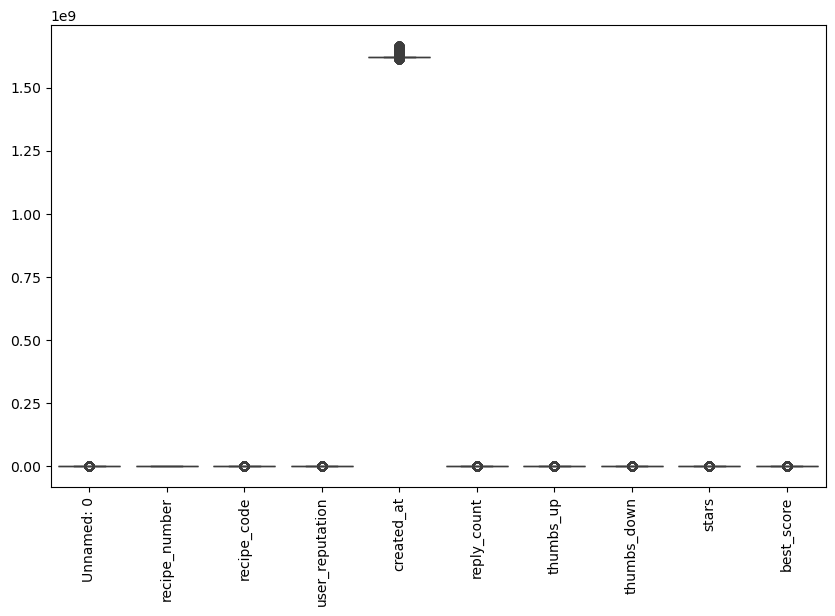

In [23]:
# Visualizing Outliers after Handling
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [24]:
# Encoding Categorical Data
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("\nCategorical Data Encoded.\n")


Categorical Data Encoded.



In [25]:
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,0,43,39,3409,13113,3046,1,2687,0,0,0,5,254,6774
1,1,0,43,39,3408,13275,4421,6,2682,0,7,0,5,421,1045
2,2,0,43,39,3407,13694,569,2,2655,0,3,0,5,407,4248
3,3,0,43,39,3406,13532,9424,1,2595,2,2,0,0,292,7625
4,4,0,43,39,3405,13432,7505,2,2671,1,7,0,0,511,16588


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['best_score'] = scaler.fit_transform(df[['best_score']])

In [27]:
# Finding and Handling Skewness
df.skew()

Unnamed: 0          2.111974
recipe_number       0.458893
recipe_code         0.112060
recipe_name         0.104380
comment_id          0.000000
user_id             0.265459
user_name          -0.098873
user_reputation    13.495964
created_at          0.301908
reply_count        11.283080
thumbs_up           7.136933
thumbs_down        10.943803
stars              -2.128602
best_score          3.811751
text                0.000926
dtype: float64

In [28]:
df.head(3)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,0,43,39,3409,13113,3046,1,2687,0,0,0,5,0.432709,6774
1,1,0,43,39,3408,13275,4421,6,2682,0,7,0,5,0.717206,1045
2,2,0,43,39,3407,13694,569,2,2655,0,3,0,5,0.693356,4248


In [29]:
skewed_cols = df.skew().abs()
skewed_features = skewed_cols[skewed_cols > 0.5].index.tolist()
skewed_features.remove('stars')

In [30]:
pt = PowerTransformer(method='yeo-johnson')
df[skewed_features] = pt.fit_transform(df[skewed_features])

In [31]:
df.skew()

Unnamed: 0         0.008106
recipe_number      0.458893
recipe_code        0.112060
recipe_name        0.104380
comment_id         0.000000
user_id            0.265459
user_name         -0.098873
user_reputation   -1.161271
created_at         0.301908
reply_count        8.722244
thumbs_up          1.343529
thumbs_down        2.177694
stars             -2.128602
best_score         1.392338
text               0.000926
dtype: float64

In [32]:
df.head(3)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,-2.705837,0,43,39,3409,13113,3046,-0.122110,2687,-0.11319,-0.536205,-0.389576,5,2.199219,6774
1,-2.462316,0,43,39,3408,13275,4421,4.906384,2682,-0.11319,2.032130,-0.389576,5,2.206113,1045
2,-2.298495,0,43,39,3407,13694,569,2.231250,2655,-0.11319,1.985286,-0.389576,5,2.206027,4248


In [33]:
# Feature selection 

In [34]:
x = df.drop(columns=['stars'])
y = df['stars']

In [35]:
sk=SelectKBest(score_func=f_regression,k=10)

In [36]:
sk.fit_transform(x,y)

array([[-2.70583671,  0.        , 43.        , ..., -0.53620459,
        -0.38957639,  2.19921864],
       [-2.46231615,  0.        , 43.        , ...,  2.03213027,
        -0.38957639,  2.20611273],
       [-2.29849457,  0.        , 43.        , ...,  1.98528602,
        -0.38957639,  2.20602717],
       ...,
       [ 0.28477296, 99.        , 96.        , ..., -0.53620459,
        -0.38957639, -0.53402577],
       [ 0.29403249, 99.        , 96.        , ..., -0.53620459,
        -0.38957639, -0.53402577],
       [ 0.30323382, 99.        , 96.        , ...,  1.66422892,
        -0.38957639,  1.64250926]])

In [37]:
selected_features=x.columns[sk.get_support()]

In [38]:
scores = sk.scores_
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("\nFeature Scores in Descending Order:")
print(feature_scores)


Feature Scores in Descending Order:
            Feature       Score
11      thumbs_down  327.320513
9       reply_count  269.577407
5           user_id  190.861478
0        Unnamed: 0   54.260168
8        created_at   46.542850
1     recipe_number   30.282231
10        thumbs_up   26.457120
2       recipe_code   20.972435
7   user_reputation   13.057101
12       best_score   12.419956
6         user_name   10.562078
4        comment_id    7.939419
3       recipe_name    0.631074
13             text    0.113411


In [39]:
df.head(3)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,-2.705837,0,43,39,3409,13113,3046,-0.122110,2687,-0.11319,-0.536205,-0.389576,5,2.199219,6774
1,-2.462316,0,43,39,3408,13275,4421,4.906384,2682,-0.11319,2.032130,-0.389576,5,2.206113,1045
2,-2.298495,0,43,39,3407,13694,569,2.231250,2655,-0.11319,1.985286,-0.389576,5,2.206027,4248


In [40]:
# Scaling

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [43]:
# Splitting the Data

In [44]:
print(f"""
  x_train shape : {x_train.shape}
  x_test shape : {x_test.shape}
  y_train shape : {y_train.shape}
  y_test shape : {x_test.shape}
  """)


  x_train shape : (14545, 14)
  x_test shape : (3637, 14)
  y_train shape : (14545,)
  y_test shape : (3637, 14)
  


# Model Building and evaluation

In [45]:
#Regression Models

In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

In [47]:
result = {}
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    
    #cross validation
    if r2 < 0:
        r2 = np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring="r2"))
    result[model_name] = {'mae':mae,'mse':mse,'rmse':rmse,'r2':max(0, r2)}

In [48]:
result_df = pd.DataFrame(result).T
print(result_df)

                        mae       mse      rmse        r2
Linear Regression  1.039173  2.268589  1.506184  0.038461
Decision Tree      1.020621  3.933462  1.983296  0.000000
Random Forest      0.957119  2.034794  1.426462  0.137555
Gradient Boosting  0.979415  2.076492  1.441004  0.119881
SVR                0.741868  2.595858  1.611167  0.000000


In [49]:
# Hyperparameter Tuning

In [50]:
rfg = RandomForestRegressor(
    random_state = 42,
    n_estimators = 50,
    max_depth = 10,
    min_samples_split = 5,
    min_samples_leaf = 2,
    max_features = 'sqrt',
    n_jobs = -1
)

In [51]:
param_grid = {
    'n_estimators': [50,100,200,300],
    'max_depth': [10,20,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [52]:
grid_search = GridSearchCV (
    estimator = rfg,
    param_grid = param_grid,
    cv = 10,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 2
)



In [53]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=10, max_features='sqrt',
                                             min_samples_leaf=2,
                                             min_samples_split=5,
                                             n_estimators=50, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=2)

In [54]:
print("Best Parameters :",grid_search.best_params_)
print("Best R2 score :",grid_search.best_score_)

Best Parameters : {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best R2 score : 0.16452360320313333


In [55]:
best_model = grid_search.best_estimator_
best_model


RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [56]:
best_model = RandomForestRegressor(max_features = 'sqrt',n_estimators = 300,n_jobs = -1,random_state = 42)


In [57]:
best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [58]:
print(f"mae:{mae},mse:{mse},rmse:{rmse},r2:{r2}")

mae:0.9510448171569975,mse:1.997188094583448,rmse:1.4132190539981577,r2:0.15349363860549547


In [59]:
#save model

In [60]:
joblib.dump(best_model,"RandomForest_model.joblib")

['RandomForest_model.joblib']

In [61]:
#load model

In [62]:
loaded_model = joblib.load("RandomForest_model.joblib")

In [63]:
#create pipeline

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


In [65]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('scaler', StandardScaler()),  
    ('feature_selection', SelectKBest(score_func=f_regression, k=10)),
    ('model', RandomForestRegressor(n_estimators=300, max_features='sqrt', n_jobs=-1, random_state=42)) 
])
    

In [66]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler()),
                ('feature_selection',
                 SelectKBest(score_func=<function f_regression at 0x000001D802B39300>)),
                ('model',
                 RandomForestRegressor(max_features='sqrt', n_estimators=300,
                                       n_jobs=-1, random_state=42))])

In [67]:
y_pred = pipeline.predict(x_test)

In [68]:
# save pipeline

In [69]:
joblib.dump(pipeline,"RandomForest_pipeline.joblib")

['RandomForest_pipeline.joblib']

In [70]:
#Load pipeline

In [71]:
loaded_pipeline = joblib.load("RandomForest_pipeline.joblib")

In [72]:
# Unseen data

In [73]:
unseen_data = pd.read_csv("C:\\Users\\anjal\\Downloads\\unseen_data.csv",encoding="latin1")

In [74]:
df_unseen = pd.DataFrame(unseen_data)

In [75]:
df_unseen.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,best_score,text,predicted_rating
0,0,-1,-1,-1,-1,-1,-1,1,-1,0,0,0,-1,-1,4.631422
1,1,-1,-1,-1,-1,-1,-1,-1,-1,0,7,0,172,-1,4.490427
2,2,-1,-1,-1,-1,-1,-1,-1,-1,0,3,0,-1,-1,4.382242
3,3,-1,-1,-1,-1,-1,-1,1,-1,2,2,0,-1,-1,4.397618
4,4,-1,-1,-1,-1,-1,-1,-1,-1,1,7,0,-1,-1,4.477198


In [76]:
print(df_unseen.describe())

       Unnamed: 0  recipe_number  recipe_code  recipe_name  comment_id  \
count     14.0000           14.0         14.0         14.0        14.0   
mean       6.5000           -1.0         -1.0         -1.0        -1.0   
std        4.1833            0.0          0.0          0.0         0.0   
min        0.0000           -1.0         -1.0         -1.0        -1.0   
25%        3.2500           -1.0         -1.0         -1.0        -1.0   
50%        6.5000           -1.0         -1.0         -1.0        -1.0   
75%        9.7500           -1.0         -1.0         -1.0        -1.0   
max       13.0000           -1.0         -1.0         -1.0        -1.0   

       user_id  user_name  user_reputation  created_at  reply_count  \
count     14.0       14.0        14.000000        14.0    14.000000   
mean      -1.0       -1.0         0.571429        -1.0     0.214286   
std        0.0        0.0         0.851631         0.0     0.578934   
min       -1.0       -1.0        -1.000000       

In [77]:
df_unseen.replace(-1, np.nan, inplace=True)

In [78]:
print("Training Features: ", scaler.feature_names_in_)
print("Unseen Data Features: ", df_unseen.columns)

Training Features:  ['Unnamed: 0' 'recipe_number' 'recipe_code' 'recipe_name' 'comment_id'
 'user_id' 'user_name' 'user_reputation' 'created_at' 'reply_count'
 'thumbs_up' 'thumbs_down' 'best_score' 'text']
Unseen Data Features:  Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'best_score', 'text',
       'predicted_rating'],
      dtype='object')


In [79]:
for col, le in label_encoders.items():
    if col in df_unseen.columns:
        df_unseen[col] = df_unseen[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

In [80]:
df_unseen = df_unseen.drop(columns=['stars'], errors='ignore')

In [81]:
df_unseen = df_unseen.drop(columns=['predicted_rating'], errors='ignore')
x_unseen = scaler.transform(df_unseen)

In [82]:
x_unseen = scaler.transform(df_unseen)
predictions = model.predict(x_unseen)

In [83]:
df_unseen['predicted_rating'] = np.clip(predictions, 0, 5) 
df_unseen.to_csv("C:\\Users\\anjal\\Downloads\\unseen_data.csv", encoding="latin1", index=False)

In [84]:
df_unseen.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,best_score,text,predicted_rating
0,0,-1,-1,-1,-1,-1,-1,1,-1,0,0,0,-1,-1,4.631422
1,1,-1,-1,-1,-1,-1,-1,-1,-1,0,7,0,-1,-1,4.421464
2,2,-1,-1,-1,-1,-1,-1,-1,-1,0,3,0,-1,-1,4.382242
3,3,-1,-1,-1,-1,-1,-1,1,-1,2,2,0,-1,-1,4.397618
4,4,-1,-1,-1,-1,-1,-1,-1,-1,1,7,0,-1,-1,4.477198
